# 1. Library

 - 분석에 필요한 기본 라이브러리 호출
 
 
 - numpy : 데이터 형태 라이브러리로 R의 tibble과 유사
 - pandas : 데이터 조작 라이브러리로 R의 dplyr과 유사
 - matplotlib : 시각화 도구로 R의 ggplot2와 유사

In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 경고창 무시
import warnings
warnings.filterwarnings("ignore")

# 2. Data Load
 - 데이터를 읽기 위해 pandas의 pd.read_csv() 함수를 사용.
 - 인자에 파일 주소를 입력
 
 
 - head() 메소드를 사용하면 데이터의 대략적인 개요가 나온다. () 안에 숫자를 입력하면 처음 데이터부터 그 숫자 만큼의 데이터가 출력

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

testcopy = test.copy()

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 3. Na Check
 - 결측값이란 데이터 수집 과정이나 기타 여러 가지 이유등으로 데이터가 정확히 수집되지 않은 값으로 보통 NaN(Not a Number)로 표시된다.

In [5]:
print('Train columns with null values: \n{} \n' .format(train.isnull().sum()))

Train columns with null values: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 



In [6]:
print('Test columns with null values: \n{}'.format(test.isnull().sum()))

Test columns with null values: 
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


# 4. Data Summary
 - describe() 메소드를 통해 카운트, 평균, 표준편차, 최솟값, 4분위수, 중앙값, 최댓값 등을 한 번에 계산할 수 있다.

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# 5. NA Treatment
 - Age, Embarked, Fare는 결측값의 수가 상대적으로 작기 때문에 Median(중앙값)으로 값을 채워 넣는다.

In [9]:
train['Age'].fillna(train['Age'].median(), inplace = True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)
train['Fare'].fillna(train['Fare'].median(), inplace = True)

In [10]:
test['Age'].fillna(test['Age'].median(), inplace = True)
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace = True)
test['Fare'].fillna(test['Fare'].median(), inplace = True)

In [11]:
print('Train columns with null values: \n{} \n' .format(train.isnull().sum()))

Train columns with null values: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64 



In [12]:
print('Test columns with null values: \n{} \n' .format(test.isnull().sum()))

Test columns with null values: 
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64 



# 6. Feature Drop
 - PassngerId(승객아이디), Cabin(결측값이 많음), Ticket(티켓 번호) 등은 모델 생성시 필요 없는 변수들로 삭제

In [13]:
drop_column = ['PassengerId','Cabin', 'Ticket']
train.drop(drop_column, axis=1, inplace = True)
test.drop(drop_column, axis=1, inplace = True)

In [14]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [15]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


# 7. Feature Engineering

In [16]:
# Train, Test 모두 적용
alltables = [train, test]

for dataset in alltables:    
    
    # 가족의 수
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1

    # 혼자 탑승했는지 여부
    dataset['IsAlone'] = 1 # 초기값을 1로 지정
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # 만약 가족의 수가 1보타 크면 0으로 변경

    # 이름에서 Mr. MIss 등을 분리해서 Title 변수로 지정
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]


    # 운임요금을 4등급으로 나눠 범주형 변수로 변환
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)

    # 나이를 4등급으로 나눠 범주형 변수로 변환
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)

# 희귀한 이름 찾기
title_names = (train['Title'].value_counts() < 10) #this will create a true false series with title name as index

# 적용
train['Title'] = train['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(train['Title'].value_counts())

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64


In [17]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]"
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]"
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]"


In [18]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,1,Mr,"(-0.001, 7.896]","(30.4, 45.6]"
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,2,0,Mrs,"(-0.001, 7.896]","(45.6, 60.8]"
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1,1,Mr,"(7.896, 14.454]","(60.8, 76.0]"
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1,1,Mr,"(7.896, 14.454]","(15.2, 30.4]"
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,3,0,Mrs,"(7.896, 14.454]","(15.2, 30.4]"


# 8. EDA

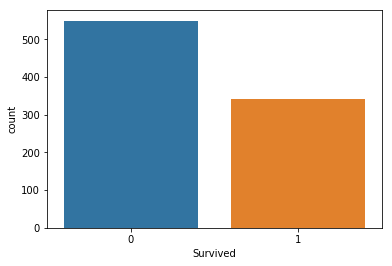

In [19]:
# 라이브러리
import seaborn as sns

# 생존 유무
sns.countplot(x="Survived", data=train)
plt.show()

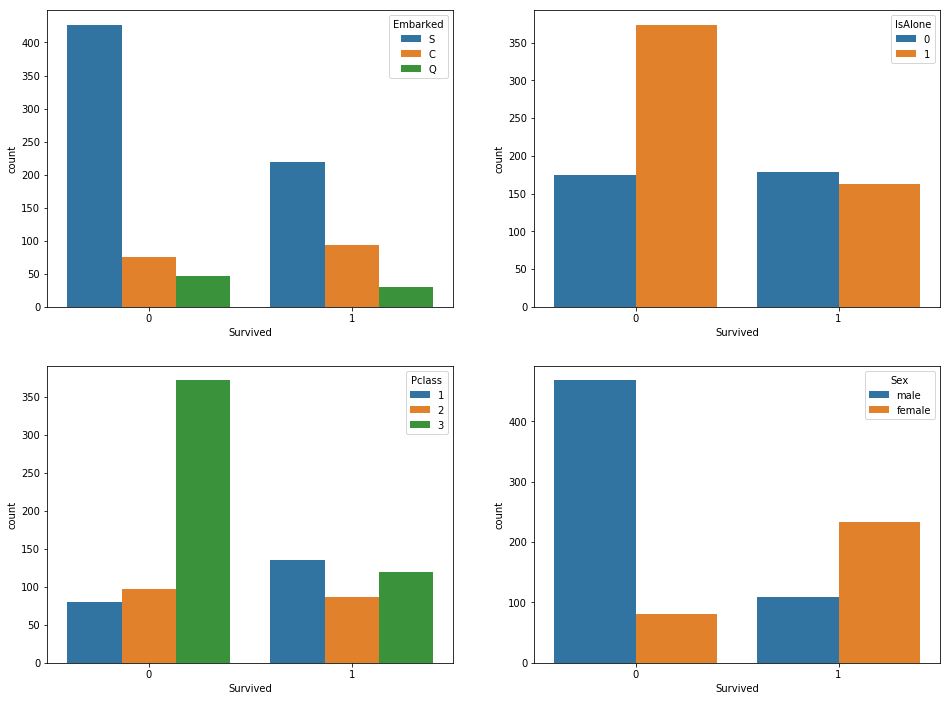

In [20]:
# 그래프 2X2 영역으로 분할
fig, saxis = plt.subplots(2, 2,figsize=(16,12))

# Embarked, IsAlone, Pclass, Sex에 따른 생존 유무
sns.countplot(x='Survived', hue="Embarked", data=train,ax = saxis[0,0])   
sns.countplot(x='Survived', hue="IsAlone", data=train,ax = saxis[0,1])
sns.countplot(x="Survived", hue="Pclass", data=train, ax = saxis[1,0])
sns.countplot(x="Survived", hue="Sex", data=train, ax = saxis[1,1])
plt.show()

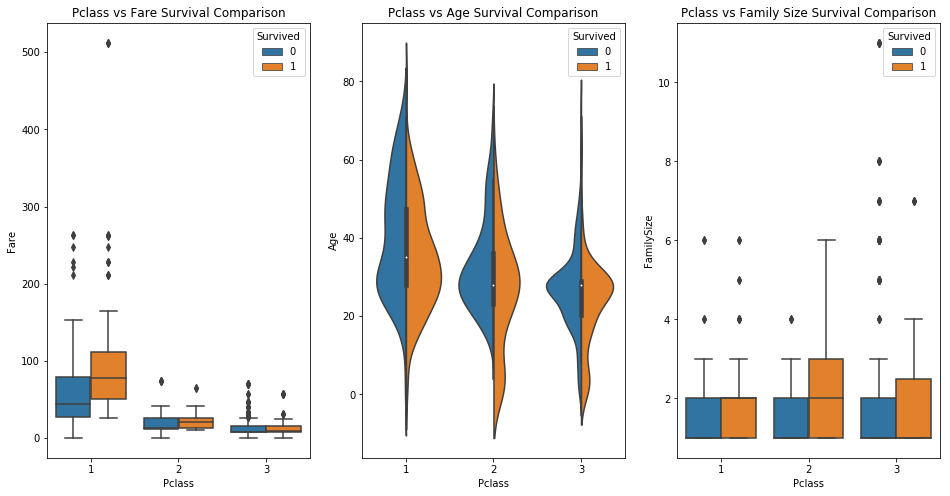

In [21]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(16,8))

sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = train, ax = axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = train, split = True, ax = axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x = 'Pclass', y ='FamilySize', hue = 'Survived', data = train, ax = axis3)
axis3.set_title('Pclass vs Family Size Survival Comparison')

plt.show()

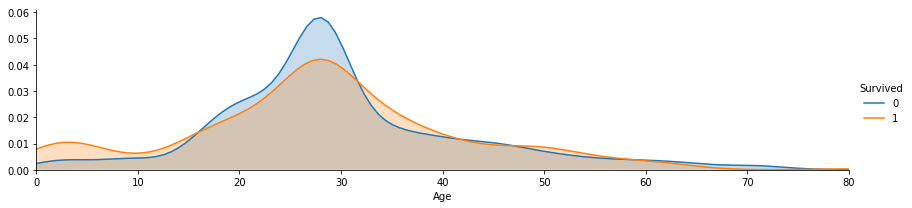

In [22]:
# 생존과 사망의 나이 분포
a = sns.FacetGrid( train, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , train['Age'].max()))
a.add_legend()
plt.show()

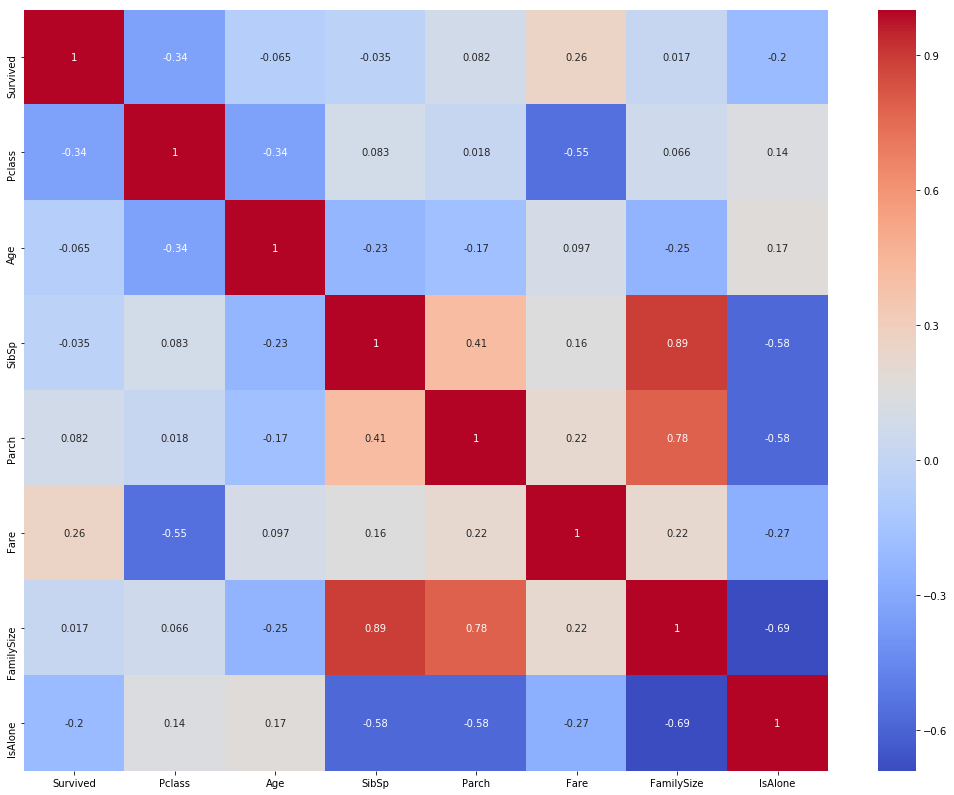

In [23]:
# Feature 히트맵
plt.subplots(figsize =(18, 14))
correlation = train.corr()
sns.heatmap(correlation, annot=True,cmap='coolwarm')
plt.show()

# 9. Convert to Categorical

In [24]:
# 라벨 인코더 호출
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

# 모든 문자 변수를 0,1,2 등의 숫자로 변환
for dataset in alltables:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])


# 타켓 변수 정의
Target = ['Survived']

# Feature 선택을 위한 변수 정의
train_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone']
train_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare'] 
train_xy =  Target + train_x
print('Original X Y: ', train_xy, '\n')


# 연속 변수를 제거하기 위해 원래 피쳐에 대한 변수 정의
train_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
train_xy_bin = Target + train_x_bin
print('Bin X Y: ', train_xy_bin, '\n')


# 더미 피쳐에 대한 변수 정의
train_dummy = pd.get_dummies(train[train_x])
train_x_dummy = train_dummy.columns.tolist()
train_xy_dummy = Target + train_x_dummy
print('Dummy X Y: ', train_xy_dummy)

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs']


In [25]:
train_dummy.head()

,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1,0,0,0,1,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,0,1
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1,0,0,1,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,0,1
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1,0,0,0,1,0


# 10. Data Split & Feature Selection

In [26]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = train_test_split(train[train_x_calc], train[Target], random_state = 0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(train[train_x_bin], train[Target] , random_state = 0)

print("DataTrain Shape: {}".format(train.shape))
print("Train1 Shape: {}".format(train1_x_dummy.shape))
print("Test1 Shape: {}".format(test1_x_dummy.shape))

DataTrain Shape: (891, 19)
Train1 Shape: (668, 8)
Test1 Shape: (223, 8)


In [27]:
train1_x_dummy.head()

,Sex_Code,Pclass,Embarked_Code,Title_Code,SibSp,Parch,Age,Fare
105,1,3,2,3,0,0,28.0,7.8958
68,0,3,2,2,4,2,17.0,7.9250
253,1,3,2,3,1,0,30.0,16.1000
320,1,3,2,3,0,0,22.0,7.2500
706,0,2,2,4,0,0,45.0,13.5000


In [28]:
test1_x_dummy.head()

,Sex_Code,Pclass,Embarked_Code,Title_Code,SibSp,Parch,Age,Fare
495,1,3,0,3,0,0,28.0,14.4583
648,1,3,2,3,0,0,28.0,7.5500
278,1,3,1,0,4,1,7.0,29.1250
31,0,1,0,4,1,0,28.0,146.5208
255,0,3,0,4,0,2,29.0,15.2458


# 11. Modeling

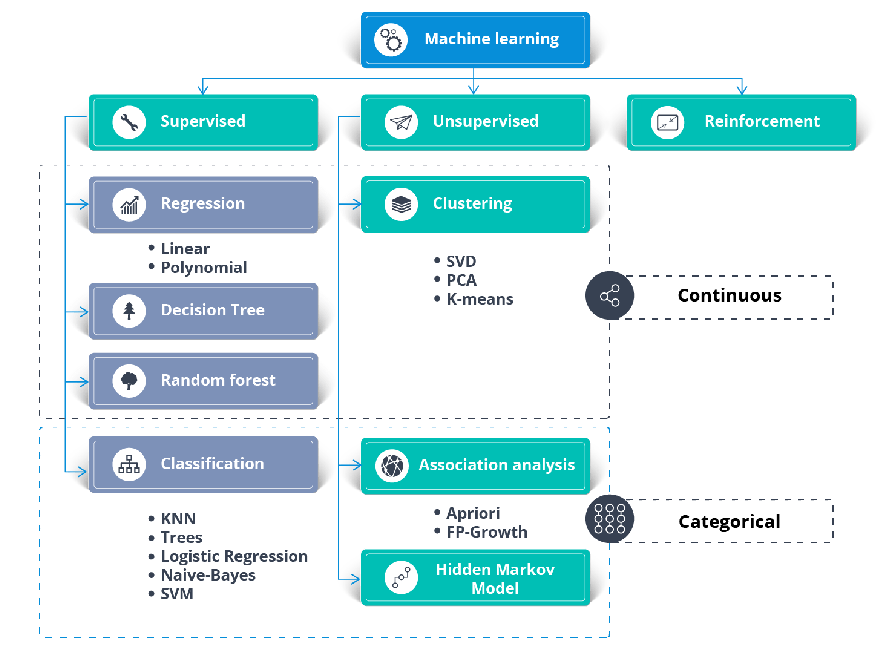

In [29]:
from matplotlib.image import imread
img = imread("./algorithm.png") ; plt.figure(figsize=(15,15)) ; plt.imshow(img) ; plt.axis("off") ; plt.show()

## Decision Tree

In [30]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Model = DecisionTreeClassifier()
Model.fit(train1_x_dummy, train1_y_dummy)
y_predL = Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy, y_predL))
print(confusion_matrix(test1_y_dummy, y_predL))
# Accuracy score
print('accuracy is',accuracy_score(y_predL,test1_y_dummy))

DT = accuracy_score(y_predL,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       139
           1       0.72      0.68      0.70        84

    accuracy                           0.78       223
   macro avg       0.77      0.76      0.76       223
weighted avg       0.78      0.78      0.78       223

[[117  22]
 [ 27  57]]
accuracy is 0.7802690582959642


## Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
Model=RandomForestClassifier(max_depth=2)
Model.fit(train1_x_dummy, train1_y_dummy)
y_predR=Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy,y_predR))
print(confusion_matrix(y_predR,test1_y_dummy))
#Accuracy Score
print('accuracy is ',accuracy_score(y_predR,test1_y_dummy))

RT = accuracy_score(y_predR,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       139
           1       0.86      0.58      0.70        84

    accuracy                           0.81       223
   macro avg       0.82      0.76      0.78       223
weighted avg       0.82      0.81      0.80       223

[[131  35]
 [  8  49]]
accuracy is  0.8071748878923767


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


## LogisticRegression

In [32]:
from sklearn.linear_model import LogisticRegression
Model = LogisticRegression()
Model.fit(train1_x_dummy, train1_y_dummy)

y_predLR = Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy, y_predLR))
print(confusion_matrix(test1_y_dummy, y_predLR))
# Accuracy score
print('accuracy is',accuracy_score(y_predLR,test1_y_dummy))

LR = accuracy_score(y_predLR,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       139
           1       0.74      0.67      0.70        84

    accuracy                           0.78       223
   macro avg       0.77      0.76      0.77       223
weighted avg       0.78      0.78      0.78       223

[[119  20]
 [ 28  56]]
accuracy is 0.7847533632286996


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## K-Nearest Neighbours

In [33]:
from sklearn.neighbors import KNeighborsClassifier

Model = KNeighborsClassifier(n_neighbors=8)
Model.fit(train1_x_dummy, train1_y_dummy)

y_predKN = Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy, y_predKN))
print(confusion_matrix(test1_y_dummy, y_predKN))
# Accuracy score

print('accuracy is',accuracy_score(y_predKN,test1_y_dummy))

KNN = accuracy_score(y_predKN,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.70      0.89      0.79       139
           1       0.68      0.38      0.49        84

    accuracy                           0.70       223
   macro avg       0.69      0.64      0.64       223
weighted avg       0.70      0.70      0.67       223

[[124  15]
 [ 52  32]]
accuracy is 0.6995515695067265


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


## Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB
Model = GaussianNB()
Model.fit(train1_x_dummy, train1_y_dummy)

y_predN = Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy, y_predN))
print(confusion_matrix(test1_y_dummy, y_predN))
# Accuracy score
print('accuracy is',accuracy_score(y_predN,test1_y_dummy))

NBB = accuracy_score(y_predN,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.87      0.78      0.83       139
           1       0.69      0.81      0.75        84

    accuracy                           0.79       223
   macro avg       0.78      0.80      0.79       223
weighted avg       0.80      0.79      0.80       223

[[109  30]
 [ 16  68]]
accuracy is 0.7937219730941704


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## SVM

In [35]:
from sklearn.svm import SVC

Model = SVC()
Model.fit(train1_x_dummy, train1_y_dummy)

y_predSVM = Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy, y_predSVM))
print(confusion_matrix(test1_y_dummy, y_predSVM))
# Accuracy score

print('accuracy is',accuracy_score(y_predSVM,test1_y_dummy))

SVMm = accuracy_score(y_predSVM,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.78      0.81      0.80       139
           1       0.67      0.63      0.65        84

    accuracy                           0.74       223
   macro avg       0.73      0.72      0.72       223
weighted avg       0.74      0.74      0.74       223

[[113  26]
 [ 31  53]]
accuracy is 0.7443946188340808


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Nu-Support Vector Classification

In [36]:
from sklearn.svm import NuSVC

ModelNU = NuSVC()
ModelNU.fit(train1_x_dummy, train1_y_dummy)

y_predNu = Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy, y_predNu))
print(confusion_matrix(test1_y_dummy, y_predNu))
# Accuracy score

print('accuracy is',accuracy_score(y_predNu,test1_y_dummy))

NuS = accuracy_score(y_predNu,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.78      0.81      0.80       139
           1       0.67      0.63      0.65        84

    accuracy                           0.74       223
   macro avg       0.73      0.72      0.72       223
weighted avg       0.74      0.74      0.74       223

[[113  26]
 [ 31  53]]
accuracy is 0.7443946188340808


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Linear Support Vector Classification

In [37]:
from sklearn.svm import LinearSVC

Model = LinearSVC()
Model.fit(train1_x_dummy, train1_y_dummy)

y_pred = Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy, y_pred))
print(confusion_matrix(test1_y_dummy, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,test1_y_dummy))

LSVM = accuracy_score(y_pred,test1_y_dummy)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.81      0.86      0.83       139
           1       0.74      0.65      0.70        84

    accuracy                           0.78       223
   macro avg       0.77      0.76      0.76       223
weighted avg       0.78      0.78      0.78       223

[[120  19]
 [ 29  55]]
accuracy is 0.7847533632286996


## Radius Neighbors Classifier

In [38]:
from sklearn.neighbors import  RadiusNeighborsClassifier
Model=RadiusNeighborsClassifier(radius=148)
Model.fit(train1_x_dummy, train1_y_dummy)
y_pred=Model.predict(test1_x_dummy)

#summary of the predictions made by the classifier
print(classification_report(test1_y_dummy,y_pred))
print(confusion_matrix(test1_y_dummy,y_pred))

#Accouracy score
print('accuracy is ', accuracy_score(test1_y_dummy,y_pred))

RNC = accuracy_score(test1_y_dummy,y_pred)

              precision    recall  f1-score   support

           0       0.64      0.99      0.78       139
           1       0.86      0.07      0.13        84

    accuracy                           0.65       223
   macro avg       0.75      0.53      0.45       223
weighted avg       0.72      0.65      0.53       223



C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[[138   1]
 [ 78   6]]
accuracy is  0.6457399103139013


## Passive Aggressive Classifier

In [39]:
from sklearn.linear_model import PassiveAggressiveClassifier
Model = PassiveAggressiveClassifier()
Model.fit(train1_x_dummy, train1_y_dummy)

y_pred = Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy, y_pred))
print(confusion_matrix(test1_y_dummy, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,test1_y_dummy))

PAC = accuracy_score(y_pred,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.70      0.97      0.81       139
           1       0.86      0.30      0.44        84

    accuracy                           0.72       223
   macro avg       0.78      0.63      0.63       223
weighted avg       0.76      0.72      0.67       223

[[135   4]
 [ 59  25]]
accuracy is 0.7174887892376681


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## BernoulliNB

In [40]:
from sklearn.naive_bayes import BernoulliNB
Model = BernoulliNB()
Model.fit(train1_x_dummy, train1_y_dummy)

y_pred = Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy, y_pred))
print(confusion_matrix(test1_y_dummy, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,test1_y_dummy))

Ber = accuracy_score(y_pred,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       139
           1       0.71      0.71      0.71        84

    accuracy                           0.78       223
   macro avg       0.77      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223

[[115  24]
 [ 24  60]]
accuracy is 0.7847533632286996


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## ExtraTreeClassifier

In [41]:
from sklearn.tree import ExtraTreeClassifier

Model = ExtraTreeClassifier()

Model.fit(train1_x_dummy, train1_y_dummy)

y_pred = Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy, y_pred))
print(confusion_matrix(test1_y_dummy, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,test1_y_dummy))

ETC = accuracy_score(y_pred,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       139
           1       0.66      0.76      0.71        84

    accuracy                           0.76       223
   macro avg       0.75      0.76      0.75       223
weighted avg       0.77      0.76      0.77       223

[[106  33]
 [ 20  64]]
accuracy is 0.7623318385650224


## Bagging classifier

In [42]:
from sklearn.ensemble import BaggingClassifier
Model=BaggingClassifier()
Model.fit(train1_x_dummy, train1_y_dummy)
y_pred=Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy,y_pred))
print(confusion_matrix(y_pred,test1_y_dummy))

#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,test1_y_dummy))

BCC = accuracy_score(y_pred,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       139
           1       0.77      0.65      0.71        84

    accuracy                           0.80       223
   macro avg       0.79      0.77      0.78       223
weighted avg       0.80      0.80      0.79       223



C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[123  29]
 [ 16  55]]
accuracy is  0.7982062780269058


## AdaBoost classifier

In [43]:
from sklearn.ensemble import AdaBoostClassifier
Model=AdaBoostClassifier()
Model.fit(train1_x_dummy, train1_y_dummy)
y_pred=Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy,y_pred))
print(confusion_matrix(y_pred,test1_y_dummy))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,test1_y_dummy))

AdaB = accuracy_score(y_pred,test1_y_dummy)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.85      0.83      0.84       139
           1       0.72      0.75      0.74        84

    accuracy                           0.80       223
   macro avg       0.78      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223

[[115  21]
 [ 24  63]]
accuracy is  0.7982062780269058


## Gradient Boosting Classifier

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
ModelG=GradientBoostingClassifier()
ModelG.fit(train1_x_dummy, train1_y_dummy)
y_predGR=ModelG.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy,y_predGR))
print(confusion_matrix(y_predGR,test1_y_dummy))

#Accuracy Score
print('accuracy is ',accuracy_score(y_predGR,test1_y_dummy))

GBCC = accuracy_score(y_predGR,test1_y_dummy)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.86      0.91      0.89       139
           1       0.84      0.75      0.79        84

    accuracy                           0.85       223
   macro avg       0.85      0.83      0.84       223
weighted avg       0.85      0.85      0.85       223

[[127  21]
 [ 12  63]]
accuracy is  0.852017937219731


## Linear Discriminant Analysis

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
Model=LinearDiscriminantAnalysis()
Model.fit(train1_x_dummy, train1_y_dummy)
y_pred=Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy,y_pred))
print(confusion_matrix(y_pred,test1_y_dummy))

#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,test1_y_dummy))

LDAA = accuracy_score(y_pred,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       139
           1       0.71      0.68      0.70        84

    accuracy                           0.78       223
   macro avg       0.76      0.76      0.76       223
weighted avg       0.77      0.78      0.77       223

[[116  27]
 [ 23  57]]
accuracy is  0.7757847533632287


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Quadratic Discriminant Analysis

In [46]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
Model=QuadraticDiscriminantAnalysis()
Model.fit(train1_x_dummy, train1_y_dummy)
y_pred=Model.predict(test1_x_dummy)

# Summary of the predictions made by the classifier
print(classification_report(test1_y_dummy,y_pred))
print(confusion_matrix(y_pred,test1_y_dummy))

#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,test1_y_dummy))

QDAx = accuracy_score(y_pred,test1_y_dummy)

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       139
           1       0.69      0.76      0.72        84

    accuracy                           0.78       223
   macro avg       0.77      0.78      0.77       223
weighted avg       0.79      0.78      0.78       223

[[110  20]
 [ 29  64]]
accuracy is  0.7802690582959642


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# 12. Score

In [47]:
models = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest',
              'LogisticRegression','K-Nearest Neighbours', 'Naive Bayes', 'SVM', 'Nu-Support Vector Classification',
             'Linear Support Vector Classification', 'Radius Neighbors Classifier', 'Passive Aggressive Classifier','BernoulliNB',
             'ExtraTreeClassifier', "Bagging classifier ", "AdaBoost classifier", 'Gradient Boosting Classifier' ,'Linear Discriminant Analysis',
             'Quadratic Discriminant Analysis'],
    'Score': [DT, RT, LR, KNN,NBB,SVMm, NuS,  LSVM , RNC, PAC, Ber, ETC, BCC, AdaB,  GBCC, LDAA, QDAx]})
models.sort_values(by='Score', ascending=False)

,Model,Score
14,Gradient Boosting Classifier,0.852018
1,Random Forest,0.807175
13,AdaBoost classifier,0.798206
12,Bagging classifier,0.798206
4,Naive Bayes,0.793722
10,BernoulliNB,0.784753
2,LogisticRegression,0.784753
7,Linear Support Vector Classification,0.784753
0,Decision Tree,0.780269
16,Quadratic Discriminant Analysis,0.780269


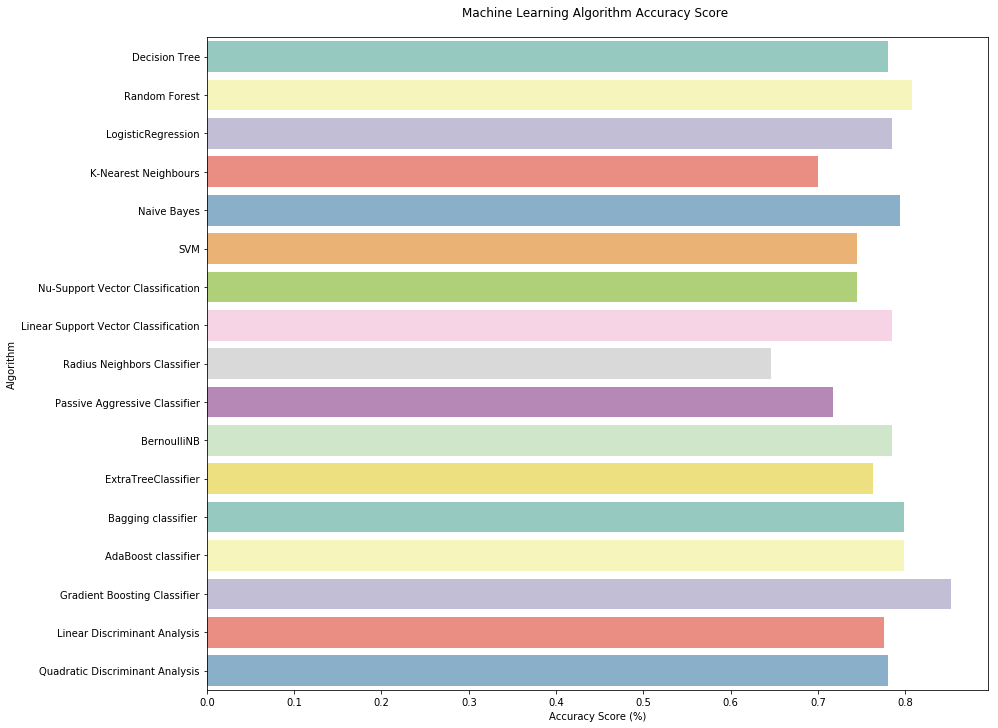

In [48]:
plt.subplots(figsize =(14, 12))

sns.barplot(x='Score', y = 'Model', data = models, palette="Set3")

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')
plt.show()

# 13. Submission

In [49]:
# 최종 모델은 Gradient Boosting 모델 선택
submit_gbc = GradientBoostingClassifier()

# Train 데이터 fitting
submit_gbc.fit(train[train_x_bin], train[Target])

# Test 데이터에 대한 예측값 반환
rr = submit_gbc.predict(test[train_x_bin])

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
# 예측 결과
rr

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [51]:
# 최종 결과물 완성
submission = pd.DataFrame({
        "PassengerId": testcopy["PassengerId"],
        "Survived": rr })
submission.to_csv('titanic_submission1.csv', index=False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
